In [107]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [125]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [126]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface. But they aren't quite a black box. We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

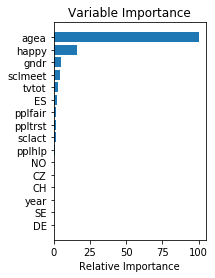

In [110]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Changing the depth.

In [111]:
# We'll make 500 iterations, use 5-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('While updating the tree depth to five levels decreases the both types of training errors substantially, it')
print('increases Type 1 errors in the test set.\n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

While updating the tree depth to five levels decreases the both types of training errors substantially, it
increases Type 1 errors in the test set substantially.

Training set accuracy:
Percent Type I errors: 0.0061374795417348605
Percent Type II errors: 0.06860338243316967

Test set accuracy:
Percent Type I errors: 0.10429447852760736
Percent Type II errors: 0.17300613496932515


## Changing the number of iterations.

In [29]:
# We'll make 1,000 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Updating the iterations to 1,000 seems to have a slightly negative effect on the test set, so we\'ll use the')
print('original parameters of 500 trees and a depth of 2 moving forward. \n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Updating the iterations to 1,000 seems to have a slightly negative effect on the test set, so we'll use the
original parameters of 500 trees and a depth of 2 moving forward. 

Training set accuracy:
Percent Type I errors: 0.044189852700491
Percent Type II errors: 0.1692580469176214

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18036809815950922


## Changing the Learning Rate

In [38]:
# We'll make 500 iterations, use 2-deep trees, set our loss function, and update the learning rate to 0.5
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
         'learning_rate': 0.9}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Updating the learning rate to 0.9 slightly increases both types of errors in the test set.')
print('Changing the learning rate to 0.01 decreases Type I errors in both the training and test sets, but')
print('increases Type II errors. Thus I will leave the learning rate at the default of 0.01. \n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Updating the learning rate to 0.9 slightly increases both types of errors in the test set.
Changing the learning rate to 0.01 decreases Type I errors in both the training and test sets, but
increases Type II errors. Thus I will leave the learning rate at the default of 0.01. 

Training set accuracy:
Percent Type I errors: 0.036552100381887616
Percent Type II errors: 0.1395253682487725

Test set accuracy:
Percent Type I errors: 0.08834355828220859
Percent Type II errors: 0.18159509202453988


## Changing the subsample

In [56]:
# We'll make 500 iterations, use 2-deep trees,  and subsample to 0.25
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
         'subsample': 0.25}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Updating the subsample to 0.25 (testing 75% of the data) surprisingly doesn\'t improve the percentage of errors.')
print('I don\'t seem to be making much headway here...\n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Updating the subsample to 0.25 (testing 75% of the data) surprisingly doesn't improve the percentage of errors.
I don't seem to be making much headway here...

Training set accuracy:
Percent Type I errors: 0.04800872885979269
Percent Type II errors: 0.171303873431533

Test set accuracy:
Percent Type I errors: 0.0736196319018405
Percent Type II errors: 0.17791411042944785


In [112]:
# We'll make 1000 iterations, use 4-deep trees, update the sample space to 0.2, and update the learning rate to 0.25
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'deviance',
         'subsample': 0.2,
         'learning_rate': 0.25}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Changing the number of iterations to 1,000, the max depth to 4, the subsample to 0.2, and the learning rate')
print('to 0.25 just to see what happens. All errors increased substantially, with the exception of Type II errors')
print('in the Test set. \n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Changing the number of iterations to 1,000, the max depth to 4, the subsample to 0.2, and the learning rate
to 0.25 just to see what happens. All errors increased substantially, with the exception of Type II errors
in the Test set. 

Training set accuracy:
Percent Type I errors: 0.12629569012547737
Percent Type II errors: 0.14961811238406983

Test set accuracy:
Percent Type I errors: 0.17423312883435582
Percent Type II errors: 0.14969325153374233


In [68]:
# We'll make 500 iterations, use 2-deep trees, update the sample space to 0.2, and update the learning rate to 0.25
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Changing the loss type to exponential minimally decreases the Type I errors and increases the Type II errors')
print('in the Test set. \n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Changing the loss type to exponential minimally decreases the Type I errors and increases the Type II errors
in the Test set. 

Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.18262411347517732

Test set accuracy:
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.1901840490797546


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


## Experimenting with the features

In [63]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [92]:
df.corr()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,ppl
idno,1.000000,0.002102,0.003963,-0.007523,0.007397,0.004484,-0.003065,-0.021376,0.004323,0.010851,0.030051,-0.014931,-0.002619
year,0.002102,1.000000,-0.031596,-0.001600,0.004283,-0.032901,-0.013378,-0.028502,0.012150,0.001355,-0.003520,0.018689,-0.000631
tvtot,0.003963,-0.031596,1.000000,-0.142422,-0.119277,-0.069080,-0.118598,-0.078864,-0.092375,0.017922,0.257674,-0.028816,-0.143054
ppltrst,-0.007523,-0.001600,-0.142422,1.000000,0.597506,0.459250,0.231533,0.122555,0.137491,-0.029921,-0.029412,-0.034371,0.885843
pplfair,0.007397,0.004283,-0.119277,0.597506,1.000000,0.480931,0.247755,0.096501,0.128808,0.022251,0.014724,-0.034054,0.836297
pplhlp,0.004484,-0.032901,-0.069080,0.459250,0.480931,1.000000,0.215323,0.080489,0.092673,0.042046,0.040351,-0.022069,0.498306
happy,-0.003065,-0.013378,-0.118598,0.231533,0.247755,0.215323,1.000000,0.182944,0.192030,-0.022413,-0.042970,-0.145061,0.260113
sclmeet,-0.021376,-0.028502,-0.078864,0.122555,0.096501,0.080489,0.182944,1.000000,0.283319,0.009533,-0.194443,0.162970,0.125017
sclact,0.004323,0.012150,-0.092375,0.137491,0.128808,0.092673,0.192030,0.283319,1.000000,-0.031648,-0.059442,0.011405,0.145811
gndr,0.010851,0.001355,0.017922,-0.029921,0.022251,0.042046,-0.022413,0.009533,-0.031648,1.000000,0.020598,0.033984,-0.002641


In [114]:
df['ppl'] = df['pplfair'] * df['ppltrst'] * df['pplhlp']

X = df.loc[:, ['happy',  'agea', 'ppl']]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [129]:
# We'll make 500 iterations, use 2-deep trees, and changing the features
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Changing the number of iterations to 1,000, the max depth to 4, the subsample to 0.2, and the learning rate')
print('to 0.25 just to see what happens. Results are varied, but there\'s a big enough jump in Type I errors')
print(' in the Test set to discourage me from using this model.\n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Changing the number of iterations to 1,000, the max depth to 4, the subsample to 0.2, and the learning rate
to 0.25 just to see what happens. Results are varied, but there's a big enough jump in Type I errors
 in the Test set to discourage me from using this model.

Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1778505182760502

Test set accuracy:
Percent Type I errors: 0.0638036809815951
Percent Type II errors: 0.18773006134969325


In [127]:
df = pd.concat([df, pd.get_dummies(df['cntry'])], axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.corr()


,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,CH,CZ,DE,ES,NO,SE
idno,1.000000,0.002102,0.003963,-0.007523,0.007397,0.004484,-0.003065,-0.021376,0.004323,0.010851,0.030051,-0.014931,-0.028832,-0.025586,0.999965,-0.038364,-0.018853,-0.031512
year,0.002102,1.000000,-0.031596,-0.001600,0.004283,-0.032901,-0.013378,-0.028502,0.012150,0.001355,-0.003520,0.018689,0.003218,0.001472,0.002100,-0.006935,0.001012,0.002085
tvtot,0.003963,-0.031596,1.000000,-0.142422,-0.119277,-0.069080,-0.118598,-0.078864,-0.092375,0.017922,0.257674,-0.028816,-0.173825,0.218606,0.004144,0.035985,-0.017619,-0.050075
ppltrst,-0.007523,-0.001600,-0.142422,1.000000,0.597506,0.459250,0.231533,0.122555,0.137491,-0.029921,-0.029412,-0.034371,0.031936,-0.225021,-0.009180,-0.152500,0.217530,0.132684
pplfair,0.007397,0.004283,-0.119277,0.597506,1.000000,0.480931,0.247755,0.096501,0.128808,0.022251,0.014724,-0.034054,0.058250,-0.215494,0.005904,-0.188744,0.191488,0.161542
pplhlp,0.004484,-0.032901,-0.069080,0.459250,0.480931,1.000000,0.215323,0.080489,0.092673,0.042046,0.040351,-0.022069,0.079003,-0.166372,0.003274,-0.223920,0.153183,0.173921
happy,-0.003065,-0.013378,-0.118598,0.231533,0.247755,0.215323,1.000000,0.182944,0.192030,-0.022413,-0.042970,-0.145061,0.110593,-0.206445,-0.003884,-0.074060,0.100777,0.063745
sclmeet,-0.021376,-0.028502,-0.078864,0.122555,0.096501,0.080489,0.182944,1.000000,0.283319,0.009533,-0.194443,0.162970,-0.021595,-0.174738,-0.022014,0.011601,0.070484,0.097158
sclact,0.004323,0.012150,-0.092375,0.137491,0.128808,0.092673,0.192030,0.283319,1.000000,-0.031648,-0.059442,0.011405,-0.004271,-0.038131,0.003764,-0.107427,0.080589,0.080040
gndr,0.010851,0.001355,0.017922,-0.029921,0.022251,0.042046,-0.022413,0.009533,-0.031648,1.000000,0.020598,0.033984,0.013925,0.024788,0.011096,0.007807,-0.027735,-0.019075


In [131]:
# We'll make 1000 iterations, use 4-deep trees, and use all variables as features, use a 20% subsample,
# and 0.25 learning rate.
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'exponential',
         'subsample':0.2,
         'learning_rate':0.25}
X = df
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Changing the number of iterations to 1,000, the max depth to 4, the subsample to 0.2, and the learning rate')
print('to 0.25 just to see what happens. The percent errors in the training set are great, but this doesn\'t transfer')
print('to the test sets.\n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Changing the number of iterations to 1,000, the max depth to 4, the subsample to 0.2, and the learning rate
to 0.25 just to see what happens. The percent errors in the training set are great, but this doesn't transfer
to the test sets.

Training set accuracy:
Percent Type I errors: 0.03505182760501909
Percent Type II errors: 0.07337697763229678

Test set accuracy:
Percent Type I errors: 0.147239263803681
Percent Type II errors: 0.1607361963190184


In [144]:
# We'll make 1000 iterations, use 4-deep trees, and use all variables as features, use a 20% subsample,
# and 0.25 learning rate.
params = {'n_estimators': 2000,
          'max_depth': 4,
          'loss': 'exponential',
         'subsample':0.2,
         'learning_rate':0.5}
X = df
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Increasing the number of iterations to 2,000, the max depth to 4, the subsample to 0.2, and the learning rate')
print('to 0.5 just to see what happens. The percent errors in the training set are great, but this doesn\'t transfer')
print('to the test sets.\n')


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Increasing the number of iterations to 2,000, the max depth to 4, the subsample to 0.2, and the learning rate
to 0.5 just to see what happens. The percent errors in the training set are great, but this doesn't transfer
to the test sets.

It appears that increasing the learning rate decreases Type I errors but increase Type II errors and tends to overfit
the training sets.

Training set accuracy:
Percent Type I errors: 0.028096017457719585
Percent Type II errors: 0.035870158210583744

Test set accuracy:
Percent Type I errors: 0.19141104294478528
Percent Type II errors: 0.1619631901840491


In [151]:
# We'll make 1000 iterations, use 4-deep trees, and use all variables as features, use a 20% subsample,
# and 0.25 learning rate.
params = {'n_estimators': 2000,
          'max_depth': 3,
          'loss': 'exponential',
         'subsample':0.1,
         'learning_rate':0.01}
X = df
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Increasing the number of iterations to 2,000, the max depth to 4, the subsample to 0.2, and the learning rate')
print('to 0.5 just to see what happens. The percent errors in the training set are great, but this doesn\'t transfer')
print('to the test sets.\n')

print('It appears that increasing the learning rate Type I errors but increase Type II errors and tends to overfit')
print('the training sets.\n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Increasing the number of iterations to 2,000, the max depth to 4, the subsample to 0.2, and the learning rate
to 0.5 just to see what happens. The percent errors in the training set are great, but this doesn't transfer
to the test sets.

It appears that increasing the learning rate Type I errors but increase Type II errors and tends to overfit
the training sets.

Training set accuracy:
Percent Type I errors: 0.04446262956901255
Percent Type II errors: 0.17444080741953083

Test set accuracy:
Percent Type I errors: 0.0687116564417178
Percent Type II errors: 0.18895705521472392


In [150]:
# We'll make 1000 iterations, use 4-deep trees, and use all variables as features, use a 20% subsample,
# and 0.25 learning rate.
params = {'n_estimators': 2000,
          'max_depth': 3,
          'loss': 'exponential',
         'subsample':0.1,
         'learning_rate':0.01}

X = df.loc[:, ['happy', 'sclmeet', 'agea']]

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print('Increasing the number of iterations to 2,000, the max depth to 4, the subsample to 0.2, and the learning rate')
print('to 0.5 just to see what happens. The percent errors in the training set are great, but this doesn\'t transfer')
print('to the test sets.\n')

print('It appears that increasing the learning rate Type I errors but increase Type II errors and tends to overfit')
print('the training sets.\n')

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Increasing the number of iterations to 2,000, the max depth to 4, the subsample to 0.2, and the learning rate
to 0.5 just to see what happens. The percent errors in the training set are great, but this doesn't transfer
to the test sets.

It appears that increasing the learning rate Type I errors but increase Type II errors and tends to overfit
the training sets.

Training set accuracy:
Percent Type I errors: 0.04582651391162029
Percent Type II errors: 0.17362247681396617

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18895705521472392


This is the best model I could come up with and it's no better than the original. Any feedback would be greatly appreciated!